<a href="https://colab.research.google.com/github/MarianoNaveyra/DataScience/blob/main/Proyecto_Partell_Naveyra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Abstract:

Este análisis busca detectar los factores claves que influyen en el resultado de un partido de fútbol, tomando como ejemplo la liga inglesa de futbol. Este dataset contiene información detallada sobre partidos de equipos locales y visitantes. Se tienen en cuenta variables como goles, tiros al arco, tarjetas, y faltas para identificar patrones que puedan explicar las diferencias en el rendimiento entre equipos locales y visitantes, así como la relación entre acciones específicas del juego y el resultado final del partido.

Hipótesis:

Los equipos locales tienen más probabilidades de ganar que los equipos visitantes.

La cantidad de tiros al arco está directamente relacionada con el número de goles.


Los equipos visitantes cometen más faltas y reciben más tarjetas que los equipos locales.

Los equipos que terminan el primer tiempo arriba el el marcador, tienen mas chances de ganar el partido.

Preguntas:

¿Cuáles son los factores clave que determinan la victoria de un equipo?

¿Los goles al medio tiempo influyen significativamente en el resultado final del partido?

¿Existen diferencias significativas en el rendimiento de los equipos locales y visitantes?

¿Qué equipo suele realizar más disparos, cometer más faltas o recibir más tarjetas?

¿Existe una relación significativa entre los disparos a puerta y los goles marcados?

¿Es más probable que los equipos que tienen más disparos a puerta marquen más goles?

In [17]:

url = 'https://raw.githubusercontent.com/MarianoNaveyra/DataScience/main/DatasetFutbol.csv'
df = pd.read_csv(url, encoding='ISO-8859-1')
df.head()



,Season,DateTime,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR
0,2000-01,2000-08-19T00:00:00Z,Charlton,Man City,4.0,0.0,H,2.0,0.0,H,...,14.0,4.0,6.0,6.0,13.0,12.0,1.0,2.0,0.0,0.0
1,2000-01,2000-08-19T00:00:00Z,Chelsea,West Ham,4.0,2.0,H,1.0,0.0,H,...,10.0,5.0,7.0,7.0,19.0,14.0,1.0,2.0,0.0,0.0
2,2000-01,2000-08-19T00:00:00Z,Coventry,Middlesbrough,1.0,3.0,A,1.0,1.0,D,...,3.0,9.0,8.0,4.0,15.0,21.0,5.0,3.0,1.0,0.0
3,2000-01,2000-08-19T00:00:00Z,Derby,Southampton,2.0,2.0,D,1.0,2.0,A,...,4.0,6.0,5.0,8.0,11.0,13.0,1.0,1.0,0.0,0.0
4,2000-01,2000-08-19T00:00:00Z,Leeds,Everton,2.0,0.0,H,2.0,0.0,H,...,8.0,6.0,6.0,4.0,21.0,20.0,1.0,3.0,0.0,0.0


In [19]:
df['FTHG'] = pd.to_numeric(df['FTHG'], errors='coerce')
df['FTAG'] = pd.to_numeric(df['FTAG'], errors='coerce')
df['HST'] = pd.to_numeric(df['HST'], errors='coerce')
df['AST'] = pd.to_numeric(df['AST'], errors='coerce')

<ipython-input-22-76db56fd36e9>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='FTR', data=df, palette='Set2')


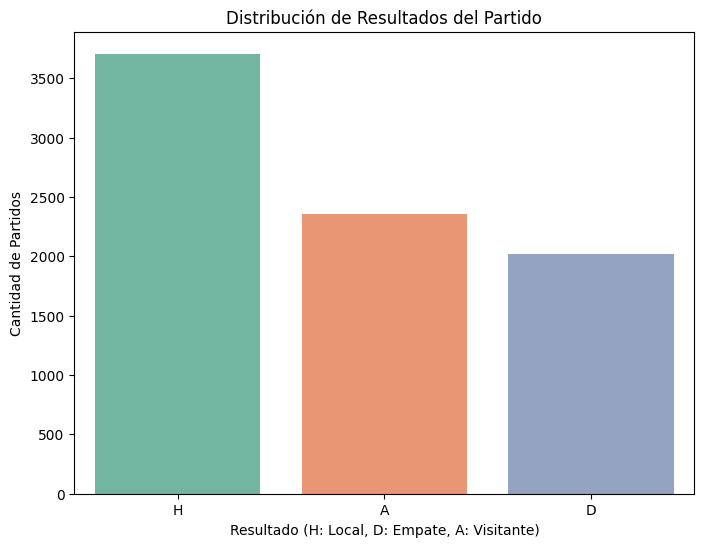

In [22]:
# Gráfico 1: Distribución de los resultados del partido (Local, Empate, Visitante)
plt.figure(figsize=(8,6))
sns.countplot(x='FTR', data=df, palette='Set2')
plt.title('Distribución de Resultados del Partido')
plt.xlabel('Resultado (H: Local, D: Empate, A: Visitante)')
plt.ylabel('Cantidad de Partidos')
plt.show()

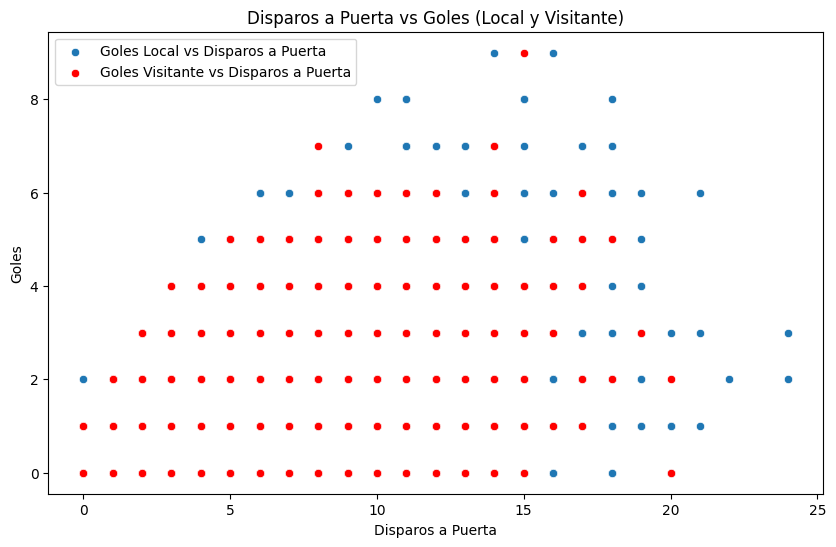

In [21]:
# Gráfico 2: Relación entre los Disparos a Puerta y Goles
plt.figure(figsize=(10,6))
sns.scatterplot(x='HST', y='FTHG', data=df, label='Goles Local vs Disparos a Puerta')
sns.scatterplot(x='AST', y='FTAG', data=df, label='Goles Visitante vs Disparos a Puerta', color='red')
plt.title('Disparos a Puerta vs Goles (Local y Visitante)')
plt.xlabel('Disparos a Puerta')
plt.ylabel('Goles')
plt.legend()
plt.show()

<ipython-input-23-363b9a745938>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='FTR', y='HF', data=df, palette='Set3')
<ipython-input-23-363b9a745938>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='FTR', y='AF', data=df, palette='Set1')


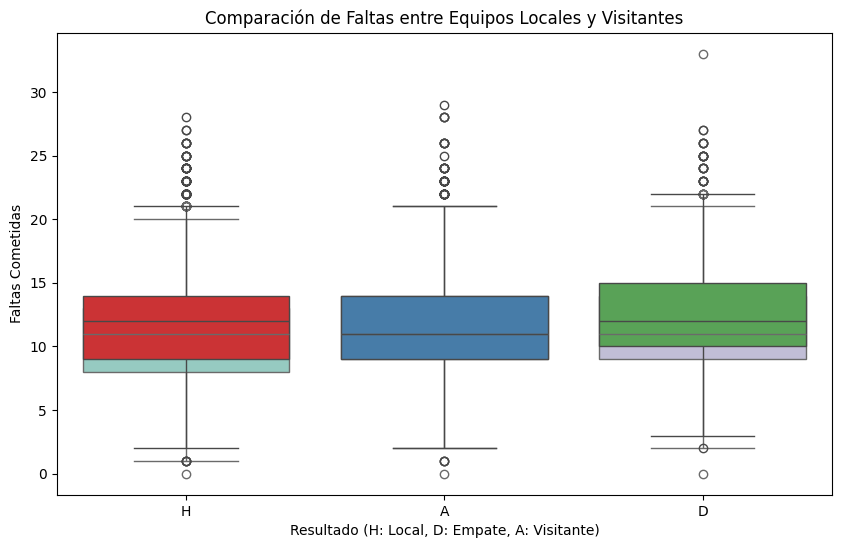

In [23]:
# Gráfico 3: Comparación de Faltas cometidas por el equipo local y visitante
plt.figure(figsize=(10,6))
sns.boxplot(x='FTR', y='HF', data=df, palette='Set3')
sns.boxplot(x='FTR', y='AF', data=df, palette='Set1')
plt.title('Comparación de Faltas entre Equipos Locales y Visitantes')
plt.xlabel('Resultado (H: Local, D: Empate, A: Visitante)')
plt.ylabel('Faltas Cometidas')
plt.show()


<ipython-input-24-4ccec21450f7>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='FTR', y='HY', data=df, palette='Blues', label='Local')
<ipython-input-24-4ccec21450f7>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='FTR', y='AY', data=df, palette='Reds', label='Visitante')


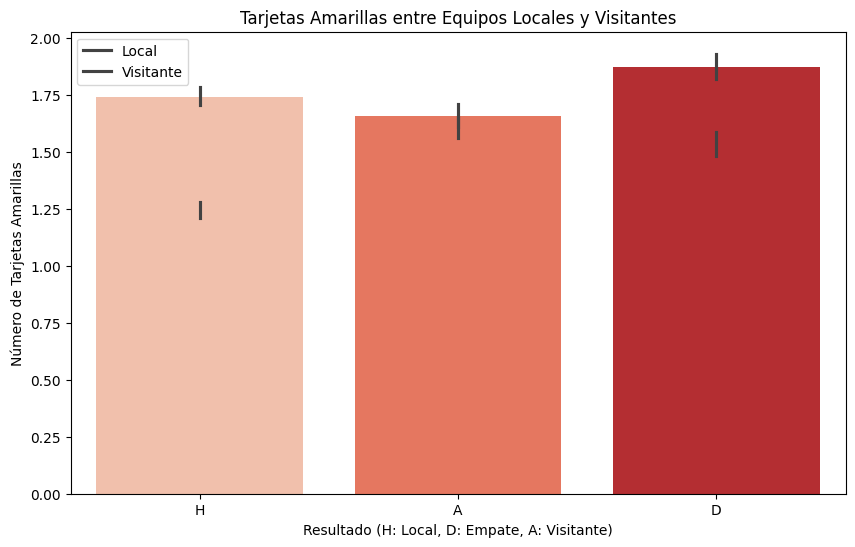

In [24]:
# Gráfico 4: Comparación de Tarjetas Amarillas entre equipos locales y visitantes
plt.figure(figsize=(10,6))
sns.barplot(x='FTR', y='HY', data=df, palette='Blues', label='Local')
sns.barplot(x='FTR', y='AY', data=df, palette='Reds', label='Visitante')
plt.title('Tarjetas Amarillas entre Equipos Locales y Visitantes')
plt.xlabel('Resultado (H: Local, D: Empate, A: Visitante)')
plt.ylabel('Número de Tarjetas Amarillas')
plt.legend(['Local', 'Visitante'])
plt.show()